In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv("../data_new_train_frequency.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,0,1,2,3,4,5,6,7,8,9,...,423,424,425,426,427,428,429,430,431,432
0,2.0,15.0,626.714286,634.0,56.748101,248.0,0.868247,2.219686,367.754214,0.933333,...,1026.542716,1023.356367,39.761120,0.717306,-0.827405,118.666667,92.0,3032.000000,1.994510,1.994510
1,3.0,17.0,573.250000,574.0,3.455069,12.0,0.879655,0.187550,546.692398,1.000000,...,679.392833,681.452371,3013.729529,0.736954,-0.394305,126.769231,104.0,1483.408284,1.169832,1.169832
2,0.0,16.0,601.466667,604.0,149.279990,534.0,0.591075,-0.365395,358.508637,1.000000,...,1159.358465,1166.300464,3196.099605,-0.342395,-1.076697,116.500000,108.0,344.750000,1.021812,1.021812
3,3.0,18.0,527.294118,528.0,3.815829,14.0,-1.115730,0.407227,238.374985,0.944444,...,1170.366114,1172.673942,301.252686,-1.338123,1.991222,105.176471,104.0,60.733564,3.610179,3.610179
4,1.0,9.0,1078.750000,1079.0,17.405100,48.0,-0.038886,-1.590773,160.562280,1.000000,...,648.710620,648.763646,14.915971,-0.020592,-1.500000,217.333333,234.0,864.888889,-0.668066,-0.668066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,0.0,13.0,739.333333,701.0,164.813700,458.0,0.295571,-1.477889,622.377173,0.846154,...,806.268783,1074.350881,192945.738555,-0.688138,-1.500000,211.333333,212.0,2480.888889,-0.020074,-0.020074
8477,2.0,12.0,806.000000,804.0,8.045326,30.0,0.293282,-0.392690,371.466947,1.000000,...,531.941377,526.389636,187.627492,1.131091,0.028858,178.000000,174.0,33.454545,0.721632,0.721632
8478,0.0,16.0,611.733333,580.0,89.098797,250.0,0.591001,-1.007843,349.706556,0.812500,...,1743.380529,1742.476727,22.290845,0.280130,-1.500000,0.000000,0.0,0.000000,0.000000,0.000000
8479,0.0,22.0,428.857143,400.0,65.391339,250.0,1.372897,1.100206,131.814329,0.409091,...,423.985913,423.554930,1178.440660,0.018830,-1.500000,0.000000,0.0,0.000000,0.000000,0.000000


In [3]:
x_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

In [4]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)

In [5]:
df_test = pd.read_csv("../data_new_test_frequency.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,0,1,2,3,4,5,6,7,8,9,...,423,424,425,426,427,428,429,430,431,432
0,3.0,18.0,550.000000,552.0,5.401525,18.0,-0.627063,-0.779917,188.108956,1.0,...,864.524781,863.899411,255.054728,1.170237,1.451361,95.764706,96.0,0.415225,-2.373464,-2.373464
1,1.0,9.0,1027.750000,1020.0,27.666541,88.0,0.627713,-0.723624,405.074443,1.0,...,801.567543,808.761171,232.561607,-0.478672,-1.479808,111.250000,112.0,2.937500,-0.391042,-0.391042
2,2.0,11.0,861.600000,861.0,8.138796,26.0,0.482926,-0.776132,467.248248,1.0,...,1098.129668,1102.002250,223.508219,-0.044741,-1.460495,297.200000,290.0,468.160000,0.872622,0.872622
3,3.0,20.0,490.842105,492.0,2.995842,12.0,-0.176463,-0.292007,518.727247,0.9,...,502.056335,476.603497,6076.663665,0.077602,-0.750063,218.000000,220.0,1736.000000,-0.071892,-0.071892
4,1.0,10.0,1024.444444,1022.0,11.729461,42.0,-0.595149,-0.188864,390.356164,0.9,...,600.996812,597.587381,628.273539,1.257026,0.893913,246.571429,224.0,6126.530612,0.958635,0.958635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,2.0,14.0,704.153846,704.0,61.074792,164.0,0.157453,-1.519895,524.534210,1.0,...,1255.350147,1243.788105,2421.984702,0.807520,-0.253818,95.076923,96.0,0.994083,-0.154303,-0.154303
2117,1.0,9.0,1012.250000,1013.0,15.014576,50.0,-0.053206,-0.738196,505.437438,1.0,...,1150.279600,1153.346809,121.068992,-1.188724,0.524721,320.857143,348.0,4652.408163,-2.030025,-2.030025
2118,3.0,16.0,591.866667,602.0,31.651997,124.0,-1.679184,1.952512,221.739711,1.0,...,782.172193,867.652069,70690.733554,-2.096229,2.518338,103.733333,102.0,583.928889,1.362206,1.362206
2119,1.0,9.0,1055.000000,1058.0,8.185353,28.0,-1.312866,0.889730,348.078372,1.0,...,1193.157453,561.636998,0.210746,-1.523574,255.000000,257.000000,45.0,-0.410774,-0.410774,0.000000


In [6]:
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [7]:
x_test = scale.transform(x_test)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train , test_size=0.5, shuffle=True, stratify=y_train, random_state=119)
print(f"Train: {x_train.shape}")
print(f"Vallidation: {x_val.shape}")

Train: (4240, 432)
Vallidation: (4241, 432)


In [9]:
rf_clf = RandomForestClassifier(criterion= 'log_loss', max_depth= 5, max_features= 'sqrt', n_estimators= 1000)
ab_clf = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.1, n_estimators= 50)
knn_clf = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')
svc_clf = SVC(C= 100, gamma= 'scale', kernel= 'rbf', probability= True)
# xgb_clf = XGBClassifier(gamma= 0,learning_rate= 0.1,max_depth= 5,min_child_weight= 1,n_estimators= 1000)
dt_clf = DecisionTreeClassifier(criterion= 'entropy',max_depth= 5,max_features= 'sqrt',splitter= 'best')

In [10]:
# Huấn luyện các mô hình con
rf_clf.fit(x_train,y_train)
ab_clf.fit(x_train, y_train)
knn_clf.fit(x_train, y_train)
svc_clf.fit(x_train, y_train)
# xgb_clf.fit(x_train, y_train)
dt_clf.fit(x_train,y_train)

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

In [11]:
# Dự đoán trên tập huấn luyện để tạo đặc trưng mới cho mô hình blending
X_train_meta = np.column_stack((
    rf_clf.predict_proba(x_val),
    ab_clf.predict_proba(x_val),
    knn_clf.predict_proba(x_val),
    svc_clf.predict_proba(x_val),
    # xgb_clf.predict_proba(x_val),
    dt_clf.predict_proba(x_val)
))
# Dự đoán trên tập kiểm tra để tạo đặc trưng mới cho mô hình blending
X_test_meta = np.column_stack((
    rf_clf.predict_proba(x_test),
    ab_clf.predict_proba(x_test),
    knn_clf.predict_proba(x_test),
    svc_clf.predict_proba(x_test),
    # xgb_clf.predict_proba(x_test),
    dt_clf.predict_proba(x_test)
))

In [12]:
print(f"X_train_meta:{X_train_meta.shape}")
print(f"X_test_meta:{X_test_meta.shape}")

X_train_meta:(4241, 20)
X_test_meta:(2121, 20)


In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model = XGBClassifier()
params = {
    'n_estimators': [1000],
    'learning_rate': [0.01],
    'max_depth': [100],
    'min_child_weight':[1],
    'gamma':[0.2],
}
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, verbose=5, return_train_score=True,refit=True)
grid_model = grid_search.fit(X_train_meta,y_val)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END gamma=0.2, learning_rate=0.01, max_depth=100, min_child_weight=1, n_estimators=1000;, score=(train=1.000, test=0.950) total time=   4.6s
[CV 2/3] END gamma=0.2, learning_rate=0.01, max_depth=100, min_child_weight=1, n_estimators=1000;, score=(train=0.999, test=0.952) total time=   5.2s
[CV 3/3] END gamma=0.2, learning_rate=0.01, max_depth=100, min_child_weight=1, n_estimators=1000;, score=(train=0.999, test=0.937) total time=   4.6s


In [21]:
result_test = grid_model.predict(X_test_meta)

In [22]:
grid_model.best_params_

{'gamma': 0.2,
 'learning_rate': 0.01,
 'max_depth': 100,
 'min_child_weight': 1,
 'n_estimators': 1000}

In [23]:
grid_model.best_score_

0.9462369197186629

In [24]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

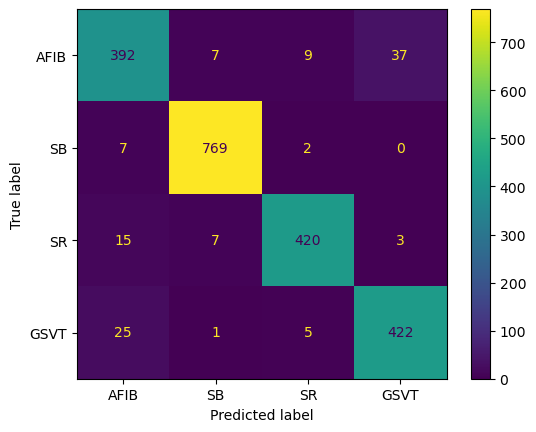

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.952852,0.880899,0.892938,0.886878,0.971957
1,SB,0.988685,0.988432,0.980867,0.984635,0.988831
2,SR,0.980669,0.943820,0.963303,0.953462,0.990453
3,GSVT,0.966525,0.931567,0.913420,0.922404,0.976019
4,macro avg,NaN,0.936845,0.937632,0.936180,NaN
5,micro avg,NaN,0.944366,0.944366,0.944366,NaN
6,weighted avg,NaN,0.944293,0.944329,0.944366,NaN


In [25]:
evaluation_test = evaluation_test(y_test,result_test)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [26]:
# df_evaluation_test.to_csv("./Result/Blending_XGB.csv")